<a href="https://colab.research.google.com/github/Imran-co/Imran/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn


Decision Tree Performance:
Accuracy: 0.7833
Precision: 0.6897
Recall: 0.8333
F1 Score: 0.7547
AUC-ROC: 0.7917

SVM Performance:
Accuracy: 0.8833
Precision: 0.8696
Recall: 0.8333
F1 Score: 0.8511
AUC-ROC: 0.8750



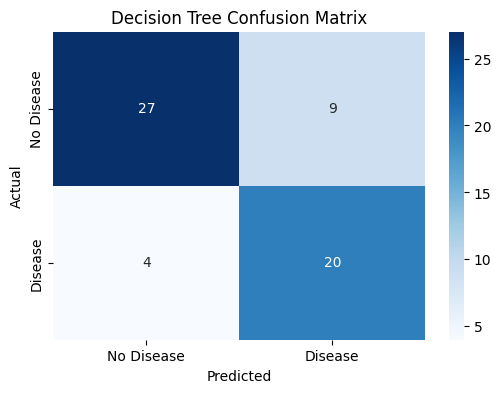

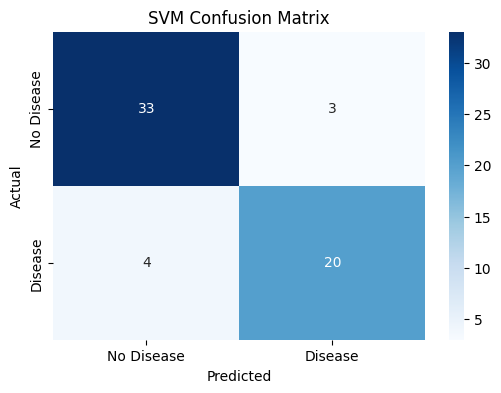

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(url, names=column_names)

# Replace missing values denoted by '?' with NaN and drop rows with NaN values
data.replace('?', np.nan, inplace=True)
data.dropna(inplace=True)

# Convert relevant columns to numeric
for col in ['ca', 'thal']:
    data[col] = pd.to_numeric(data[col])

# Convert target variable to binary (0: absence, 1: presence)
data['target'] = data['target'].apply(lambda x: 1 if x > 0 else 0)

# Split data into features and target
X = data.drop('target', axis=1)
y = data['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize classifiers
dt_classifier = DecisionTreeClassifier(random_state=42)
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)

# Train classifiers
dt_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)

# Predict on test data
dt_predictions = dt_classifier.predict(X_test)
svm_predictions = svm_classifier.predict(X_test)

# Evaluate performance
def evaluate_performance(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {auc:.4f}\n")
    return accuracy, precision, recall, f1, auc

dt_metrics = evaluate_performance(y_test, dt_predictions, "Decision Tree")
svm_metrics = evaluate_performance(y_test, svm_predictions, "SVM")

# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, dt_predictions, "Decision Tree")
plot_confusion_matrix(y_test, svm_predictions, "SVM")
